# Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [ ]:
anime = pd.read_csv('anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


# Basic info of dataset

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


# Data cleaning

In [ ]:
obj_cols = anime.select_dtypes(include = ['object']).columns
print('The number of obj cols before conversion:',obj_cols)
Null_values = anime.isnull().sum()
print('Number of null values before treating them :',Null_values)
# Converting episodes and ratings  col to numeric as it is stored as object
# Checking for null values before filling the null values
# Filling the null values
# As rating,type and genre columns are categorical replacing with  "unknown" is good idea instead of np.nan which only works for numeric cols
anime['genre'] = anime['genre'].fillna('Unknown')
anime['rating'] = anime['rating'].fillna(np.nan)
anime['type'] = anime['type'].fillna('Unknown')
#converting rating col to numeric
anime['rating']=pd.to_numeric(anime['rating'])
# Converting episodes and ratings  col to numeric as it is stored as object
unknown_count = (anime['episodes'] =='Unknown').sum()
print('Number of Unknown values in episodes col:',unknown_count) # episode col has 340 unknown values.
# Converting episodes col to numeric as it is stored as object and replace unknown value with nan
anime['episodes'] = anime['episodes'].replace('Unknown',np.nan).astype(float)
obj_cols = anime.select_dtypes(include = ['object']).columns
print("number of obj cols after conversion:",obj_cols)
# Checking for any null values after treating them
Null_values = anime.isnull().sum()
print('Number of null values after treating:',Null_values)

The number of obj cols before conversion: Index(['name', 'genre', 'type', 'episodes'], dtype='object')
Number of null values before treating them : anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
Number of Unknown values in episodes col: 340
number of obj cols after conversion: Index(['name', 'genre', 'type'], dtype='object')
Number of null values after treating: anime_id      0
name          0
genre         0
type          0
episodes    340
rating      230
members       0
dtype: int64


Null values are not removed for data analysis as they mean as important information

# Basic statistics

In [ ]:
print('\nBasic statistics:\n',anime.describe())


Basic statistics:
            anime_id      episodes        rating       members
count  12294.000000  11954.000000  12064.000000  1.229400e+04
mean   14058.221653     12.382550      6.473902  1.807134e+04
std    11455.294701     46.865352      1.026746  5.482068e+04
min        1.000000      1.000000      1.670000  5.000000e+00
25%     3484.250000      1.000000      5.880000  2.250000e+02
50%    10260.500000      2.000000      6.570000  1.550000e+03
75%    24794.500000     12.000000      7.180000  9.437000e+03
max    34527.000000   1818.000000     10.000000  1.013917e+06


# Distribution of Anime Type


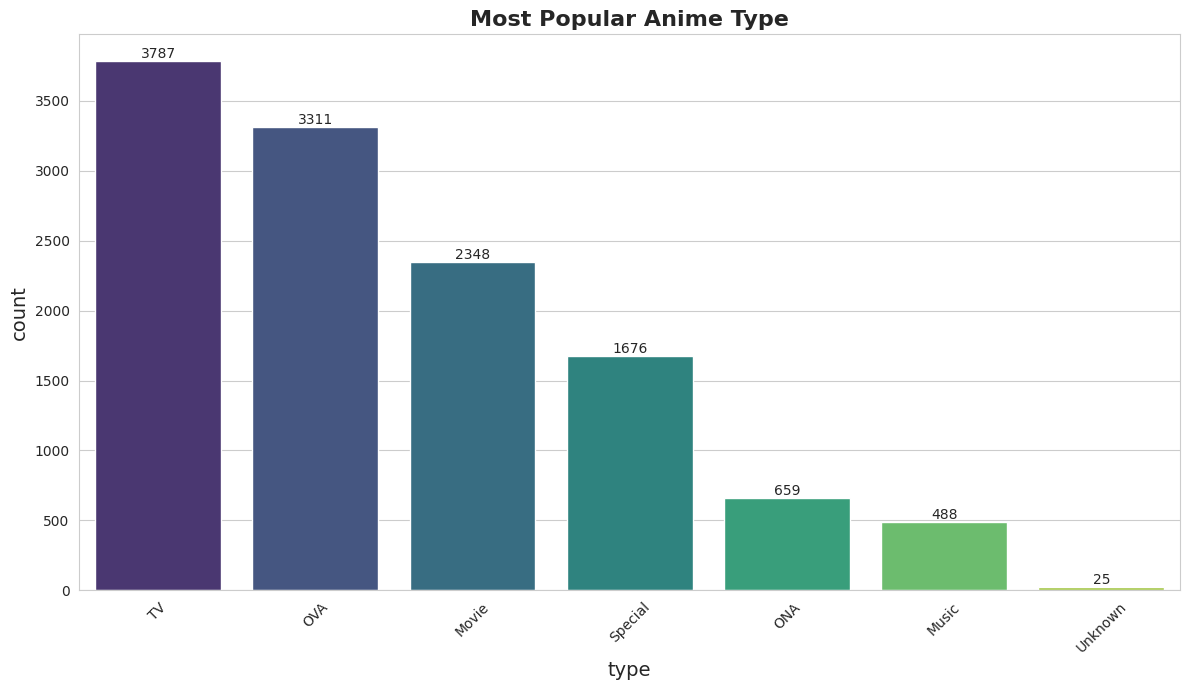

In [ ]:
plt.figure(figsize = (12,7))
ax = sns.countplot(data = anime,x ='type',order = anime['type'].value_counts().index,palette = 'viridis')
plt.xlabel('type',fontsize = 14)
plt.ylabel('count',fontsize = 14)
plt.xticks(rotation = 45)
plt.title('Most Popular Anime Type',fontsize = 16,fontweight = 'bold')
for container in ax.containers:
  ax.bar_label(container)
plt.tight_layout()
plt.show()

# Distribution of Anime rating

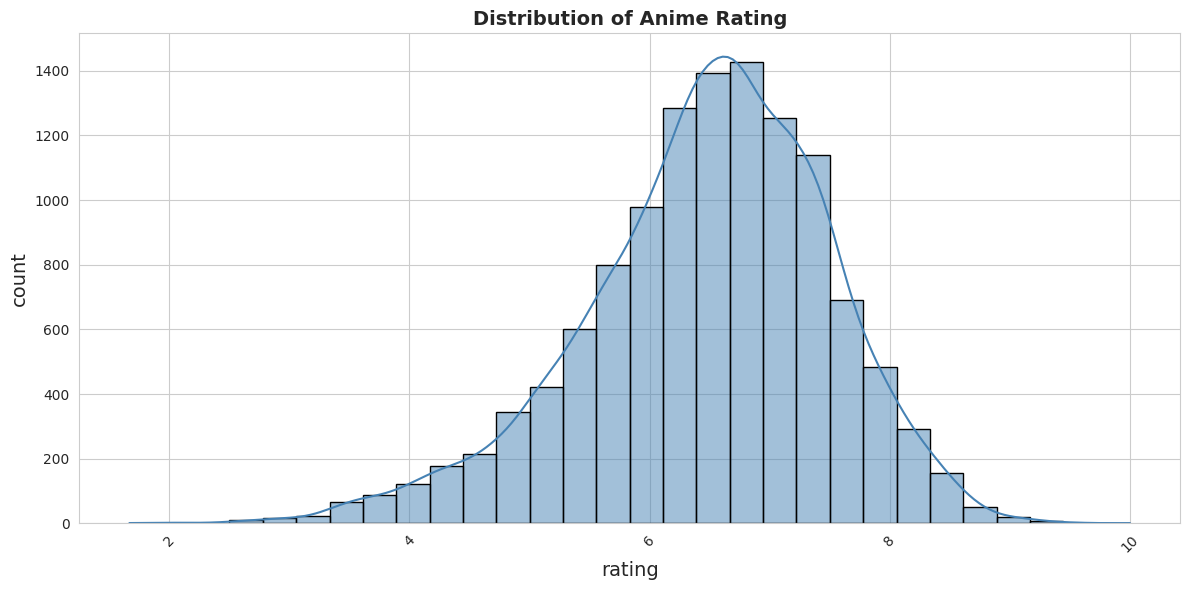

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.histplot(anime['rating'].dropna(),bins = 30,kde = True,color = 'steelblue',edgecolor = 'black')
plt.xlabel('rating',fontsize = 14)
plt.ylabel('count',fontsize = 14)
plt.xticks(rotation = 45)
plt.title('Distribution of Anime Rating',fontsize = 14,fontweight = 'bold')
plt.tight_layout()
plt.show()

# Top 10 Genres

In [ ]:
from collections import Counter
# Splitting genre(strings) into list
genres = anime['genre'].dropna().str.split(", ").sum()
#here each genre splitted with comma and space .sum() returns list of all genres available
genre_counts = Counter(genres) # Counts the no of genres
top_genres = pd.DataFrame(genre_counts.most_common(10), columns = ['genres','count']) # Returns the top 10 genres
top_genres

,genres,count
0,Comedy,4645
1,Action,2845
2,Adventure,2348
3,Fantasy,2309
4,Sci-Fi,2070
5,Drama,2016
6,Shounen,1712
7,Kids,1609
8,Romance,1464
9,School,1220


# Plotting Top 10 genres

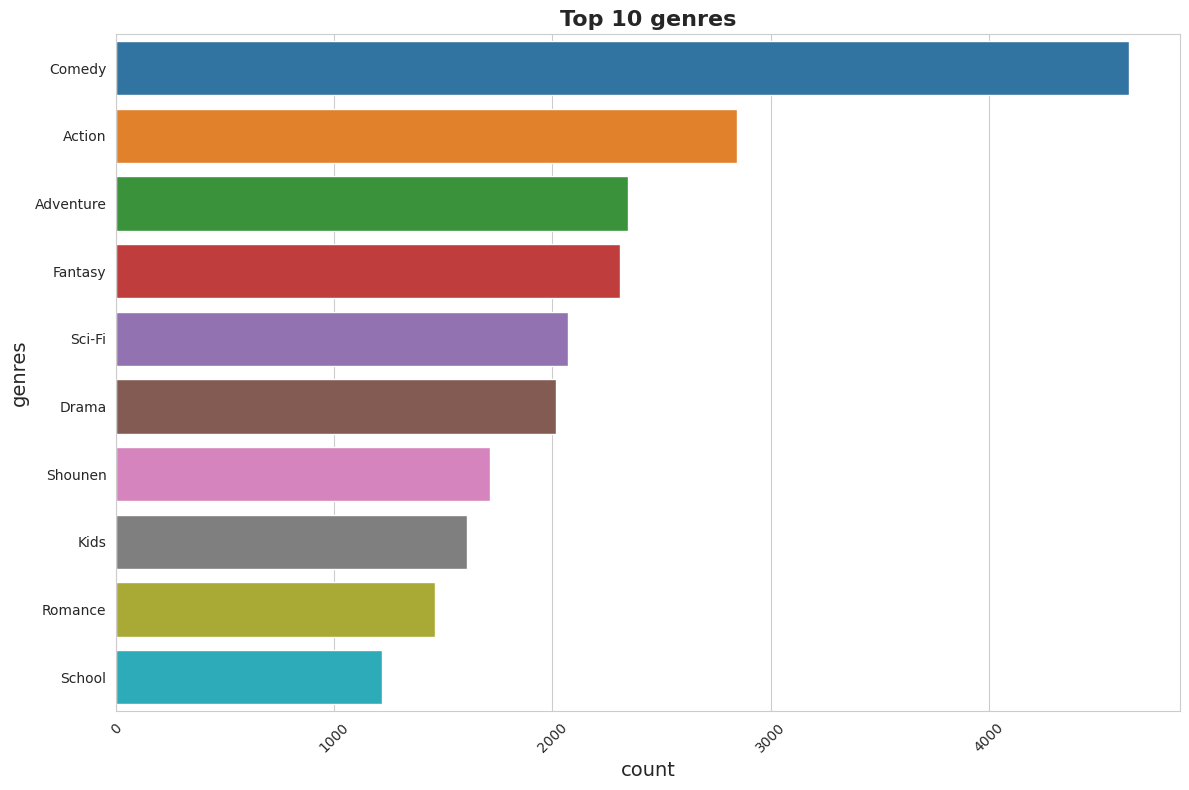

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(data = top_genres,x = 'count',y = 'genres',palette = 'tab10')
plt.xlabel('count',fontsize = 14)
plt.ylabel('genres',fontsize = 14)
plt.xticks(rotation = 45)
plt.title('Top 10 genres',fontsize = 16,fontweight = 'bold')
plt.tight_layout()
plt.show()

# Popularity vs Rating

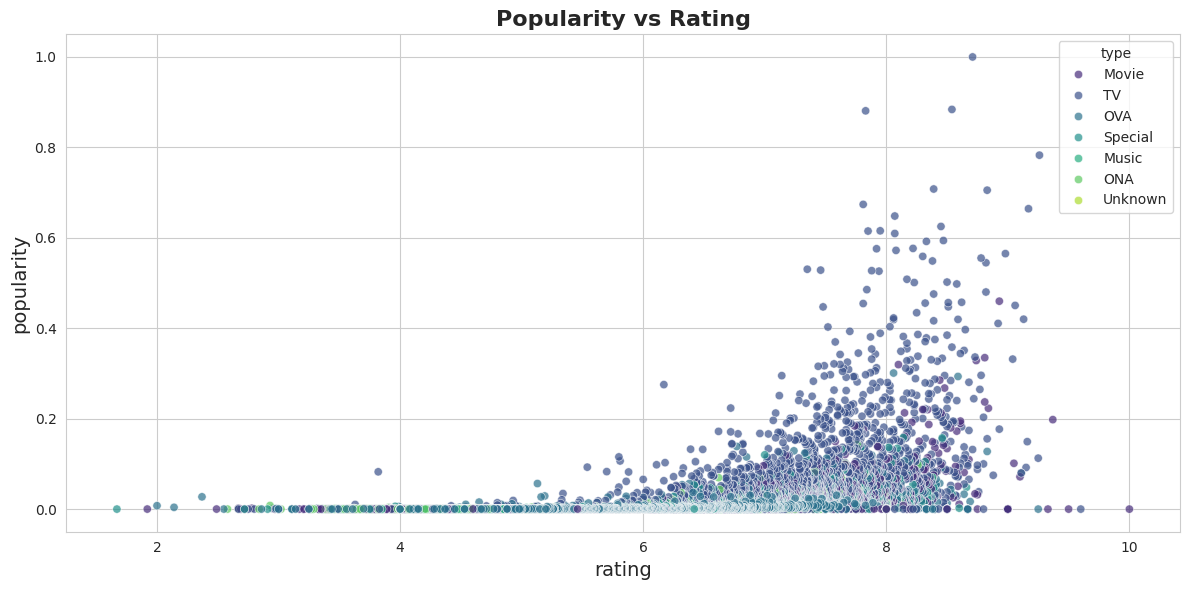

In [ ]:
anime['popularity'] = (anime['members']-anime['members'].min())/(anime['members'].max()-anime['members'].min())
sns.set_style('whitegrid')
plt.figure(figsize = (12,6))
sns.scatterplot(data = anime,x = 'rating',y = 'popularity',hue = 'type',palette = 'viridis',alpha = 0.7)
plt.xlabel('rating',fontsize = 14)
plt.ylabel('popularity',fontsize = 14)
plt.title('Popularity vs Rating',fontsize = 16,fontweight = 'bold')
plt.tight_layout()
plt.show()

After looking at this visualization, I found that popularity and rating are positively related, but not in a straight-line way.
What surprised me is that even high-rated anime don't always become popular. From ratings 2 to 6, most anime stay unpopular. Things start improving after rating 6, and once anime hit around 8 or higher, that's when we see them really taking off in terms of popularity.
So basically, quality matters, but there's like a minimum bar around 7-8 that anime need to cross before they can become mainstream hits.

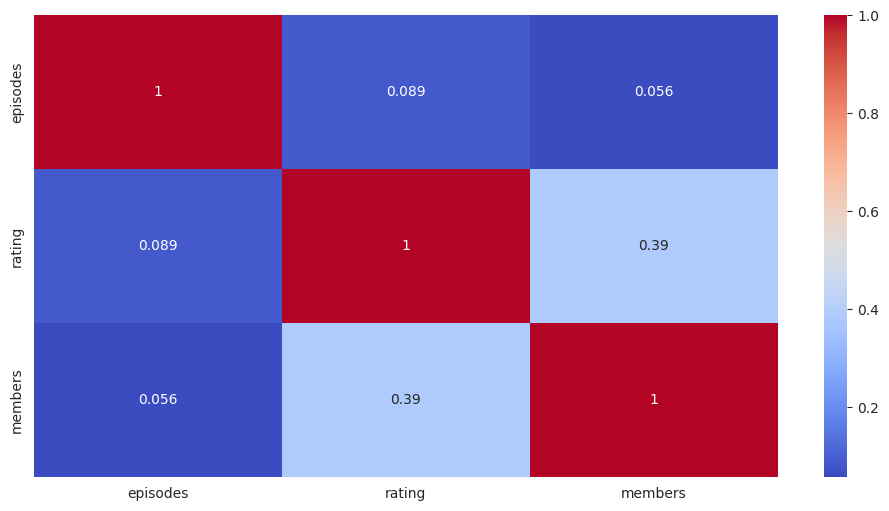

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(anime[['episodes','rating','members']].corr(),annot = True,cmap = 'coolwarm')
plt.show()

The correlation analysis shows that rating has a decent connection with popularity (0.39), confirming that quality does help attract more members. What surprised me though is that episode count barely correlates with anything - whether an anime is long or short doesn't seem to affect how good or popular it becomes.

In [ ]:
top_anime = anime.sort_values(by='rating', ascending=False).head(10)
top_anime = pd.DataFrame(top_anime,columns = ['name','type','rating','members'])
top_anime
#print("\nTop 10 Anime by Rating:\n", top_anime[['name','type','rating','members']])

,name,type,rating,members
10464,Taka no Tsume 8: Yoshida-kun no X-Files,Movie,10.00,13
10400,Spoon-hime no Swing Kitchen,TV,9.60,47
9595,Mogura no Motoro,Movie,9.50,62
0,Kimi no Na wa.,Movie,9.37,200630
9078,Kahei no Umi,Movie,9.33,44
1,Fullmetal Alchemist: Brotherhood,TV,9.26,793665
2,Gintama°,TV,9.25,114262
10786,Yakusoku: Africa Mizu to Midori,OVA,9.25,53
3,Steins;Gate,TV,9.17,673572
4,Gintama&#039;,TV,9.16,151266


I am surprised! that Not all animes that have higher ratings have more popularity